In [ ]:
import numpy as np
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
doc1 = "This is a very good and plain paper. this is really \
good and interesting"
doc2 = "This paper is very good interesting, awesome"

In [ ]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english") + list(punctuation) 
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [ ]:
doc1_clean = clean_txt(doc1)
doc1_clean

In [ ]:
doc2_clean = clean_txt(doc2)
doc2_clean

In [ ]:
doc = pd.DataFrame([doc1_clean, doc2_clean], columns=["text"])
doc

In [ ]:
#CountVectorizer of sklearn gives us the DTM
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Instantiating CountVectorizer
count_vect = CountVectorizer()

In [ ]:
#Invoking fit_transoform on the CountVectorizer object
X = count_vect.fit_transform(doc['text'])
X

In [ ]:
X.toarray()

- fit -> extract distinct words to form a bag of words
- transform -> compute the occourrence of every word from the BOW in each document

In [ ]:
#Obtaining the BOW's
bow = count_vect.get_feature_names()
bow

In [ ]:
#Get the position of every word in the BOW, as a dictionary
print(count_vect.vocabulary_)

In [ ]:
#To get the position of a particular word in BOW
count_vect.vocabulary_['really']

In [ ]:
#Printing the document term matrix can be done using toarray() or todense()
#methods
X.toarray()

In [ ]:
X.todense()

In [ ]:
DTM = pd.DataFrame(X.toarray(),columns = count_vect.get_feature_names())
DTM

In [ ]:
DTM = pd.DataFrame(X.toarray(),columns = bow)
DTM

In [ ]:
#Term document matrix or TDM is a transpose of DTM 
#which is used in finding similarity between words
TDM = DTM.T
TDM

## ngram analysis
- unigram -> a token comprises of a exactly a single word
- bigram -> a token comprises of exactly two words
- trigram -> a token comprises of eaxctly three words

### The next immediate word(s) are grouped with the current word to form a bigram or a tri-gram
- For example: suppose we have a string " how are you doing"
- unigram :{"how", "are", "you", "doing"}
- bigram: {"how are", "are you", "you doing"}
- trigram:{"how are you", "are you doing"}

### Any combination of unigrams, bigrams and trigrams can be obtained using a Countvectorizer

- By default the vectorizer's in sklearn will perform on unigrams, i.e ngram_range will be set to (1,1)
- to extarct bigrams ngram_range = (2,2)
- to extract trigrams ngram_range = (3,3)
- To extract both unigrams and bigrams ngram_range = (1,2)

In [ ]:
# A token is called as a bigram if its min and max length is 2
count_vect_bg = CountVectorizer(ngram_range=(2,2))

In [ ]:
X_bg = count_vect_bg.fit_transform(doc['text'])

In [ ]:
doc['text']

In [ ]:
print(count_vect_bg.get_feature_names())

In [ ]:
DTM_bg = pd.DataFrame(X_bg.toarray(),
                      columns=count_vect_bg.get_feature_names())
DTM_bg

In [ ]:
DTM_bg.sum()

In [ ]:
count_vect_ubg = CountVectorizer(ngram_range=(1,2))

In [ ]:
X_ubg = count_vect_ubg.fit_transform(doc['text'])

In [ ]:
print(count_vect_ubg.get_feature_names())

In [ ]:
DTM_ubg = pd.DataFrame(X_ubg.toarray(),
                      columns=count_vect_ubg.get_feature_names())
DTM_ubg

 ### Setting max features
 
 1. your vectorizer's take another argument called max_features where in you can specify the top n features to be selected
 2. on your DTM, if you perfrom column sum, you will get the total No. of occourrence of a word accross all the documents

In [ ]:
#Get the top 3 features in our DTM based on their frequencies
#accross all the documents in the corpus by taking a column sum of all the words in the DTM
count_nfeatures = CountVectorizer(max_features=5,ngram_range=(1,2))

In [ ]:
X_nfeatures = count_nfeatures.fit_transform(doc['text'])
doc['text']

In [ ]:
count_nfeatures.get_feature_names()

In [ ]:
DTM_nfeatures = pd.DataFrame(X_nfeatures.toarray(),
                            columns=count_nfeatures.get_feature_names())
DTM_nfeatures

In [ ]:
DTM_nfeatures.T

In [ ]:
# Get the DTM for all the trigrams - CountVectorizer(ngram_range=(3,3))

### TFIDF

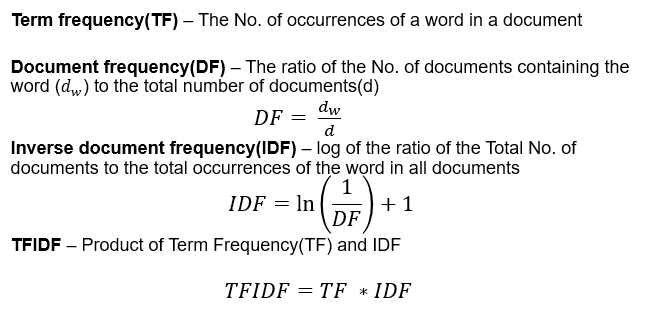

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(2,2))

In [ ]:
X = tfidf_vect.fit_transform(doc['text'])
X

In [ ]:
tfidf = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names())
tfidf

In [ ]:
tfidf_square = tfidf.apply(lambda x: x**2)
tfidf_square

In [ ]:
doc['text']

In [ ]:
tfidf_square.sum(axis=1)

### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cs = cosine_similarity(DTM)
print(cs)

In [ ]:
cs_words = cosine_similarity(DTM.T)

In [ ]:
sim_mat = pd.DataFrame(cs_words,columns=DTM.columns,index=DTM.columns)
#sim_mat = pd.DataFrame(cs_words,columns=DTM.columns)
sim_mat

In [ ]:
DTM.T